In [1]:
import os
#import re
import glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("paper")

In [2]:
pd.__version__

'1.0.3'

In [3]:
protein_anchorcontain_csvs = glob.glob("../prot-input.anchor-compare/*anchor_containment.csv")
protein_anchorjaccard_csvs = glob.glob("../prot-input.anchor-compare/*anchor_jaccard.csv")
nucl_anchorcontain_csvs = glob.glob("../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide*anchor_containment.csv")
nucl_anchorjaccard_csvs = glob.glob("../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide*anchor_jaccard.csv")

anchorcontain_csvs = protein_anchorcontain_csvs + nucl_anchorcontain_csvs
anchorjaccard_csvs = protein_anchorjaccard_csvs + nucl_anchorjaccard_csvs

print("\n".join(anchorcontain_csvs))
print("")
print("\n".join(anchorjaccard_csvs))

../prot-input.anchor-compare/gtdb95-evolpaths.protein-k9.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k7.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k19.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k35.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k11.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k17.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k33.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.protein-k10.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.dayhoff-k15.anchor_containment.csv
../prot-input.anchor-compare/gtdb95-evolpaths.hp-k30.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide-k21.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpaths.nucleotide-k51.anchor_containment.csv
../dna-input.anchor-compare/gtdb95-evolpa

In [4]:
containDF = pd.concat([pd.read_csv(csv, sep=",").assign(fileinfo=os.path.basename(csv).rsplit("*anchor_containment.csv")[0]) for csv in anchorcontain_csvs], ignore_index=True)

In [5]:
containDF["alphabet"] = containDF["fileinfo"].str.extract(r"gtdb95-evolpaths.(?P<alphabet>\w*)-k")
containDF["ksize"] = containDF["fileinfo"].str.extract(r"-k(?P<ksize>\d*)")
containDF["alpha-ksize"] = containDF["alphabet"] + "-" + containDF["ksize"]
containDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo,alphabet,ksize,alpha-ksize
0,path1,1.0,0.565631,0.043689,0.004272,0.006408,0.000777,0.000777,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
1,path10,1.0,0.392667,0.050857,0.017938,0.012813,0.006505,0.000394,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
2,path100,1.0,0.141583,0.038867,0.015452,0.011163,0.006262,0.002723,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
3,path1000,1.0,0.558610,0.075580,0.060356,0.021313,0.009850,0.004298,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
4,path1001,1.0,0.156157,0.069271,0.046039,0.018211,0.009021,0.003234,gtdb95-evolpaths.protein-k9.anchor_containment...,protein,9,protein-9
...,...,...,...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.004893,0.000376,0.000376,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38437,path996,1.0,0.104712,0.000827,0.000551,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38438,path997,1.0,0.059396,0.000000,0.001007,0.000000,0.000336,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31
38439,path998,1.0,0.000956,0.000319,0.000319,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k31.anchor_contain...,nucleotide,31,nucleotide-31


In [6]:
jaccardDF = pd.concat([pd.read_csv(csv, sep=",").assign(fileinfo=os.path.basename(csv).rsplit("*anchor_jaccard.csv")[0]) for csv in anchorjaccard_csvs], ignore_index=True)

In [7]:
containDF["evolpath"].nunique()

2957

In [8]:
jaccardDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo
0,path1,1.0,0.217728,0.010906,0.001286,0.000822,0.000463,0.000099,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
1,path10,1.0,0.250553,0.024568,0.004397,0.003444,0.001246,0.000000,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
2,path100,1.0,0.051006,0.014082,0.007092,0.003448,0.002518,0.000894,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
3,path1000,1.0,0.368313,0.026182,0.024999,0.008840,0.003847,0.001435,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
4,path1001,1.0,0.060409,0.026927,0.017966,0.007563,0.003340,0.001074,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv
...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.001340,0.000339,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38437,path996,1.0,0.023712,0.000000,0.000265,0.000118,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38438,path997,1.0,0.011492,0.000000,0.000295,0.000129,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...
38439,path998,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...


In [9]:
#jaccardDF["evolpath"].fillna(jaccardDF["Unnamed: 0"], inplace=True)
#jaccardDF.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
jaccardDF["alphabet"] = jaccardDF["fileinfo"].str.extract(r"gtdb95-evolpaths.(?P<alphabet>\w*)-k")
jaccardDF["ksize"] = jaccardDF["fileinfo"].str.extract(r"-k(?P<ksize>\d*)")
jaccardDF["alpha-ksize"] = jaccardDF["alphabet"] + "-" + jaccardDF["ksize"]
jaccardDF

,evolpath,anchor_species,genus,family,order,class,phylum,superkingdom,fileinfo,alphabet,ksize,alpha-ksize
0,path1,1.0,0.217728,0.010906,0.001286,0.000822,0.000463,0.000099,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
1,path10,1.0,0.250553,0.024568,0.004397,0.003444,0.001246,0.000000,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
2,path100,1.0,0.051006,0.014082,0.007092,0.003448,0.002518,0.000894,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
3,path1000,1.0,0.368313,0.026182,0.024999,0.008840,0.003847,0.001435,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
4,path1001,1.0,0.060409,0.026927,0.017966,0.007563,0.003340,0.001074,gtdb95-evolpaths.protein-k11.anchor_jaccard.csv,protein,11,protein-11
...,...,...,...,...,...,...,...,...,...,...,...,...
38436,path995,1.0,0.001340,0.000339,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38437,path996,1.0,0.023712,0.000000,0.000265,0.000118,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38438,path997,1.0,0.011492,0.000000,0.000295,0.000129,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51
38439,path998,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,gtdb95-evolpaths.nucleotide-k51.anchor_jaccard...,nucleotide,51,nucleotide-51


In [11]:
containMelt=pd.melt(containDF, id_vars=["evolpath", "ksize", "alphabet", "alpha-ksize"], value_vars=["anchor_species", "genus", "family", "order", "class", "phylum", "superkingdom"],
        var_name='rank', value_name='containment')

In [12]:
containMelt

,evolpath,ksize,alphabet,alpha-ksize,rank,containment
0,path1,9,protein,protein-9,anchor_species,1.0
1,path10,9,protein,protein-9,anchor_species,1.0
2,path100,9,protein,protein-9,anchor_species,1.0
3,path1000,9,protein,protein-9,anchor_species,1.0
4,path1001,9,protein,protein-9,anchor_species,1.0
...,...,...,...,...,...,...
269082,path995,31,nucleotide,nucleotide-31,superkingdom,0.0
269083,path996,31,nucleotide,nucleotide-31,superkingdom,0.0
269084,path997,31,nucleotide,nucleotide-31,superkingdom,0.0
269085,path998,31,nucleotide,nucleotide-31,superkingdom,0.0


In [13]:
#dayhoff_rankinfo = dayhoff.groupby("rank", "alphabet")['num_lca_kmers'].agg('sum')
rankorder = ["genus", "family", "order", "class", "phylum", "superkingdom"]
nucl_order = ["nucleotide-21", "nucleotide-31", "nucleotide-51"]
prot_order = ["protein-7", "protein-9", "protein-10", "protein-11"]
dayhoff_order = ["dayhoff-15", "dayhoff-17", "dayhoff-19"]
hp_order = ["hp-30", "hp-33", "hp-35"]

alphak_order = nucl_order + prot_order + dayhoff_order + hp_order

alphabet_colors = {"nucleotide":"#b2182b", "protein": "#2166ac", "dayhoff": "#4393c3", "hp": "#92c5de"}
alphabet_order = ["nucleotide", "protein", "dayhoff", "hp"]
protnucl_colors = {"nucleotide":"#b2182b", "protein": "#2166ac"}
protnucl_order = ["nucleotide", "protein"]

pnlong_colors = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-10": "#2166ac"}
pnlong_colors2 = {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582", "protein-7": "#2166ac"}

alphak_colors = {}
nucl_colors =  {"nucleotide-21":"#b2182b","nucleotide-31":"#d6604d","nucleotide-51":"#f4a582"}
protein_colors = {"protein-7": "#a1d99b", "protein-9": "#74c476", "protein-10": "#31a354", "protein-11": "#006d2c"} 
dayhoff_colors = {"dayhoff-15": "#9e9ac8", "dayhoff-17": "#756bb1", "dayhoff-19": "#54278f"}
hp_colors = {"hp-30": "#6baed6", "hp-33": "#3182bd", "hp-35": "#08519c"}

alphak_colors.update(nucl_colors)
alphak_colors.update(protein_colors)
alphak_colors.update(dayhoff_colors)
alphak_colors.update(hp_colors)

In [14]:
jaccardMelt=pd.melt(jaccardDF, id_vars=["evolpath", "ksize", "alphabet", "alpha-ksize"], value_vars=["anchor_species", "genus", "family", "order", "class", "phylum", "superkingdom"],
        var_name='rank', value_name='jaccard')

### Are zeroes an issue? (logscale plots)

In [15]:
print(len(jaccardMelt))
print(len(jaccardMelt[jaccardMelt["jaccard"] == 0]))

269087
32496


In [16]:
print(len(containMelt))
print(len(containMelt[containMelt["containment"] == 0]))

269087
32496


In [17]:
# Handle zeroes for logscale plots
jaccardMelt.loc[:,"jaccard1"] = jaccardMelt["jaccard"] + 0.0001
containMelt.loc[:,"containment1"] = containMelt["containment"] + 0.0001

In [18]:
containMelt

,evolpath,ksize,alphabet,alpha-ksize,rank,containment,containment1
0,path1,9,protein,protein-9,anchor_species,1.0,1.0001
1,path10,9,protein,protein-9,anchor_species,1.0,1.0001
2,path100,9,protein,protein-9,anchor_species,1.0,1.0001
3,path1000,9,protein,protein-9,anchor_species,1.0,1.0001
4,path1001,9,protein,protein-9,anchor_species,1.0,1.0001
...,...,...,...,...,...,...,...
269082,path995,31,nucleotide,nucleotide-31,superkingdom,0.0,0.0001
269083,path996,31,nucleotide,nucleotide-31,superkingdom,0.0,0.0001
269084,path997,31,nucleotide,nucleotide-31,superkingdom,0.0,0.0001
269085,path998,31,nucleotide,nucleotide-31,superkingdom,0.0,0.0001


In [19]:
steps_dict = {"anchor_species": 0, "genus": 1, "family": 2, "order": 3, "class": 4, "phylum": 5, "superkingdom":6}
containMelt.loc[:, "steps"] = containMelt["rank"].map(steps_dict)
jaccardMelt.loc[:,"steps"] = jaccardMelt["rank"].map(steps_dict)



In [20]:
jaccardMelt

,evolpath,ksize,alphabet,alpha-ksize,rank,jaccard,jaccard1,steps
0,path1,11,protein,protein-11,anchor_species,1.0,1.0001,0
1,path10,11,protein,protein-11,anchor_species,1.0,1.0001,0
2,path100,11,protein,protein-11,anchor_species,1.0,1.0001,0
3,path1000,11,protein,protein-11,anchor_species,1.0,1.0001,0
4,path1001,11,protein,protein-11,anchor_species,1.0,1.0001,0
...,...,...,...,...,...,...,...,...
269082,path995,51,nucleotide,nucleotide-51,superkingdom,0.0,0.0001,6
269083,path996,51,nucleotide,nucleotide-51,superkingdom,0.0,0.0001,6
269084,path997,51,nucleotide,nucleotide-51,superkingdom,0.0,0.0001,6
269085,path998,51,nucleotide,nucleotide-51,superkingdom,0.0,0.0001,6


In [21]:
nucl_21 = jaccardMelt[jaccardMelt["alpha-ksize"].isin(["nucleotide-21"])]
nucl_21_colors = {"nucleotide-21":"#b2182b"}

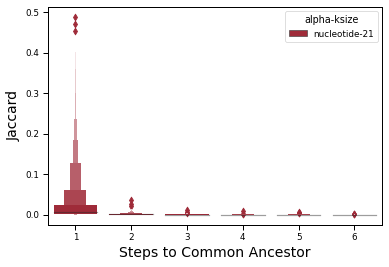

In [22]:
g=sns.boxenplot(data=nucl_21, x="steps", y="jaccard", hue="alpha-ksize", palette=nucl_21_colors, order=[1,2,3,4,5,6], hue_order=nucl_21_colors ) #palette="GnBu_d"
#lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl21.pdf")

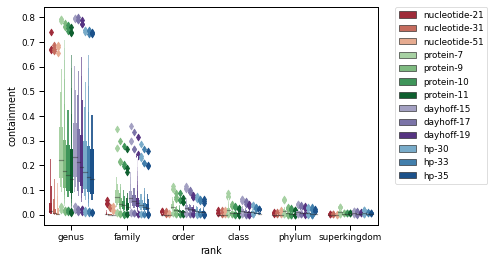

In [23]:
g=sns.boxenplot(data=containMelt, x="rank", y="containment", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

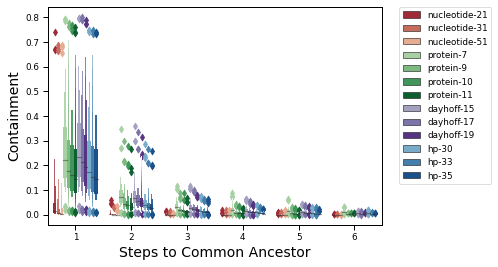

In [24]:
g=sns.boxenplot(data=containMelt, x="steps", y="containment", hue="alpha-ksize", palette=alphak_colors, order=[1,2,3,4,5,6], hue_order=alphak_order ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Containment", size=14)
fig = g.get_figure()
fig.savefig("anchor-containment.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

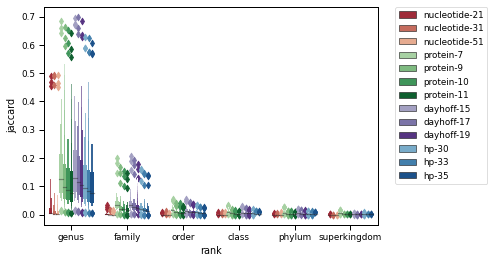

In [25]:
g=sns.boxenplot(data=jaccardMelt, x="rank", y="jaccard", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"

lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.all.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

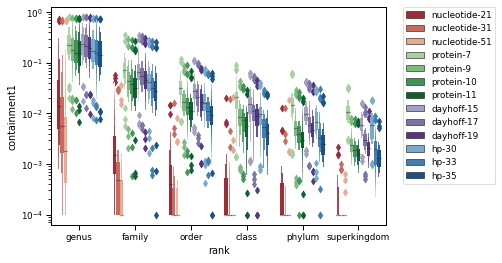

In [26]:
g=sns.boxenplot(data=containMelt, x="rank", y="containment1", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.all.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

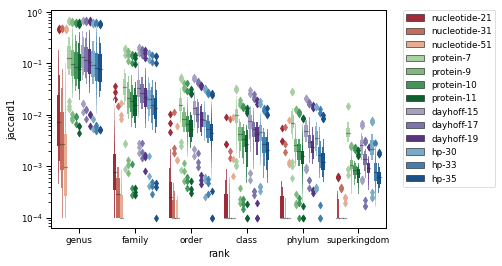

In [27]:
g=sns.boxenplot(data=jaccardMelt, x="rank", y="jaccard1", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.all.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [28]:
selected_alphak = ["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10", "dayhoff-19", "hp-35"]

In [29]:
selectedContain =  containMelt[containMelt["alpha-ksize"].isin(selected_alphak)]

In [30]:
selectedJaccard =  jaccardMelt[jaccardMelt["alpha-ksize"].isin(selected_alphak)]

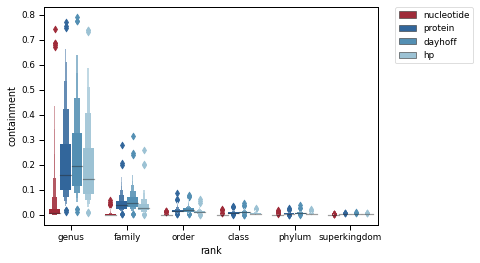

In [31]:
g=sns.boxenplot(data=selectedContain, x="rank", y="containment", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
lgd= g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.alpha-avg.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

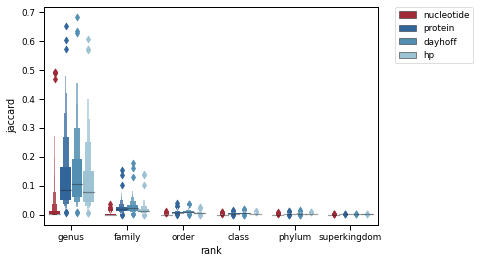

In [32]:
g=sns.boxenplot(data=selectedJaccard, x="rank", y="jaccard", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
lgd = g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.alpha-avg.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

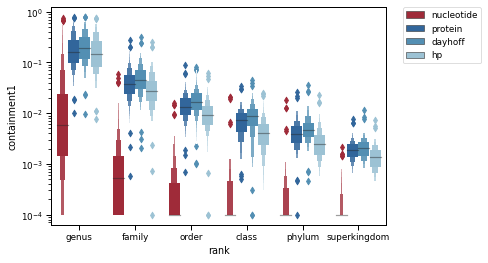

In [33]:
g=sns.boxenplot(data=selectedContain, x="rank", y="containment1", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd = g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.alpha-avg.logscale.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

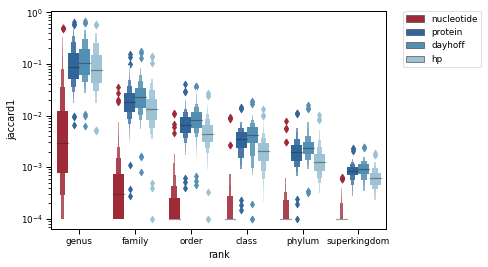

In [34]:
g=sns.boxenplot(data=selectedJaccard, x="rank", y="jaccard1", hue="alphabet", palette=alphabet_colors, order=rankorder, hue_order=alphabet_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.alpha-avg.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [35]:
prot_nucl_onlyContain =  containMelt[containMelt["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]

In [36]:
prot_nucl_onlyJaccard =  jaccardMelt[jaccardMelt["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]


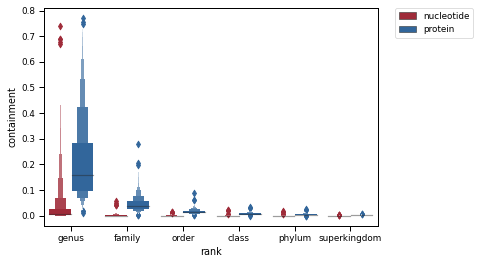

In [37]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

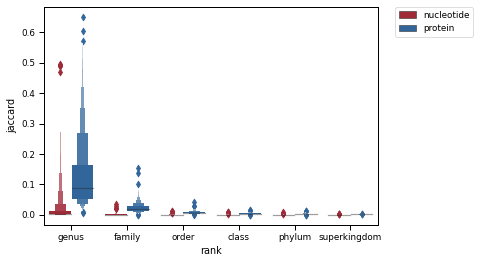

In [38]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl-prot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

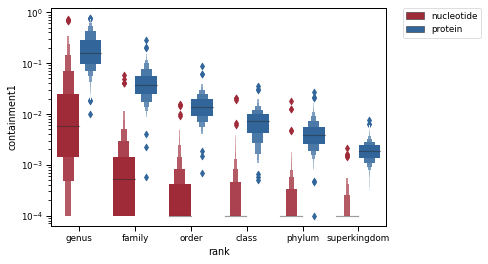

In [39]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment1", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl-prot.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

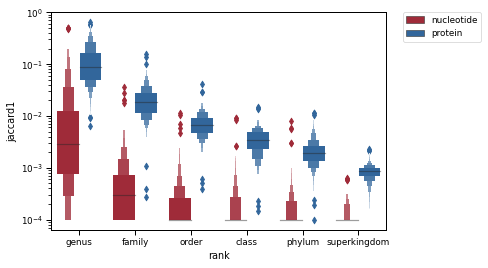

In [40]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard1", hue="alphabet", palette=protnucl_colors, order=rankorder, hue_order=protnucl_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl-prot.logscale.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

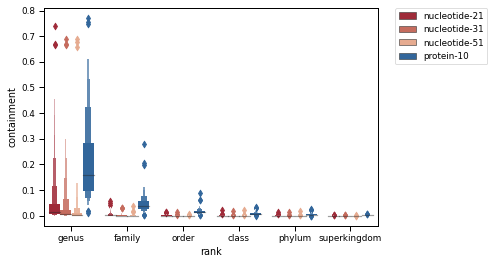

In [41]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

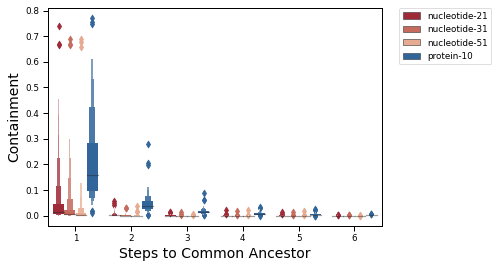

In [42]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="steps", y="containment", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Containment", size=14)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.steps.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

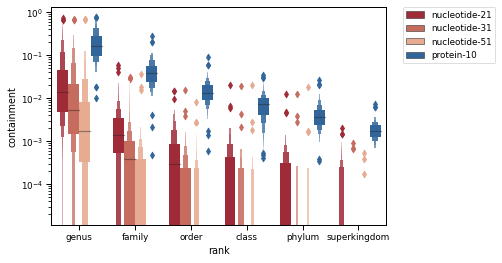

In [43]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="rank", y="containment", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

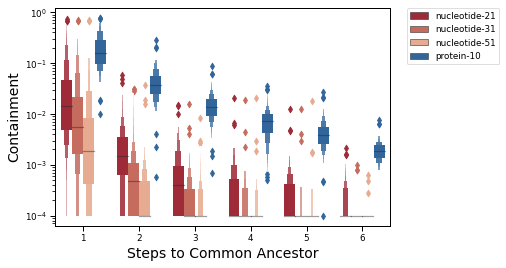

In [44]:
g=sns.boxenplot(data=prot_nucl_onlyContain, x="steps", y="containment1", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Containment", size=14)
g.set(yscale="log")
fig = g.get_figure()
fig.savefig("anchor-containment.nucl3-prot.logscale.steps.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

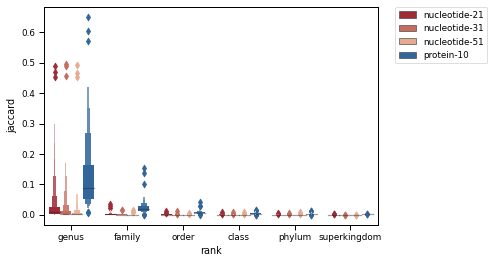

In [45]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="rank", y="jaccard", hue="alpha-ksize", palette=pnlong_colors, order=rankorder, hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

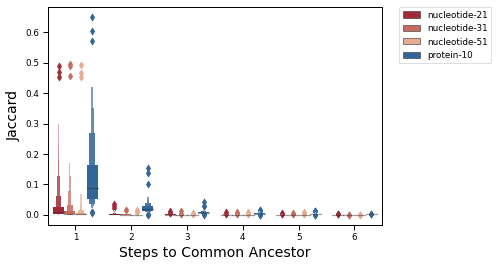

In [46]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="steps", y="jaccard", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Jaccard", size=14)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.steps.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

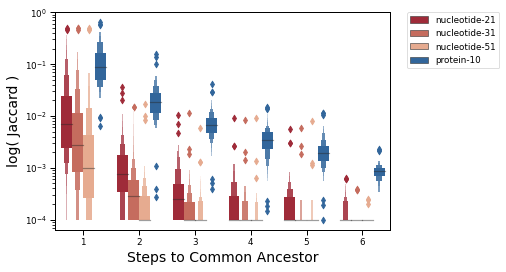

In [47]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="steps", y="jaccard1", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("log( Jaccard )", size=14)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.logscale.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

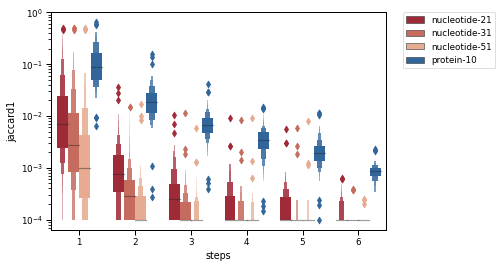

In [48]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="steps", y="jaccard1", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.logscale.steps.pdf",  bbox_extra_artists=(lgd,), bbox_inches='tight')

In [49]:
#g=sns.scatter(data=prot_nucl_onlyJaccard, x="steps", y="jaccard", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
#g.set(yscale="log")

# Can we transform jaccard for better evolutionary distance estimation?

see [On the transformation of MinHash-based uncorrected distances into proper evolutionary distances for phylogenetic inference](https://f1000research.com/articles/9-1309/v1)
## proportion p of observed differences between the two aligned genomes

p = 1 - ((2*jaccard/ jaccard + 1)^(1/ksize))

## pairwise evolutionary distance d

d = −(b1)ln(1− p/b2)

** Parameters b1 and b2
can be defined according to explicit models to estimate the
number d of nucleotide substitutions per character that have
occurred during the evolution of the sequences x and y,
e.g. 15–24. When b1 = b2 = 1, Equation (2) corresponds to the
Poisson correction distance. Although it is based on a 
simplistic model of nucleotide substitution , PC is the 
p-distance transformation implemented in many MH tools 
(e.g. Mash, Dashing, FastANI, Kmer-db, BinDash). However, 
more accurate distance estimates may be obtained by using 
substitution models based on more parameters. 

In [50]:
# make sure formats are right
jaccardMelt["jaccard"] = pd.to_numeric(jaccardMelt["jaccard"])
jaccardMelt["ksize"] = pd.to_numeric(jaccardMelt["ksize"])

In [51]:
# Drop jaccard zeroes, then calculate pdist
jaccardMelt_noz = jaccardMelt.loc[jaccardMelt["jaccard"] != 0]
jaccardMelt_noz["pdist"] =  1- ((2*jaccardMelt_noz["jaccard"]/(jaccardMelt_noz["jaccard"]+1))** (1/jaccardMelt_noz["ksize"]))


/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
jaccardMelt_noz

,evolpath,ksize,alphabet,alpha-ksize,rank,jaccard,jaccard1,steps,pdist
0,path1,11,protein,protein-11,anchor_species,1.000000,1.000100,0,0.000000
1,path10,11,protein,protein-11,anchor_species,1.000000,1.000100,0,0.000000
2,path100,11,protein,protein-11,anchor_species,1.000000,1.000100,0,0.000000
3,path1000,11,protein,protein-11,anchor_species,1.000000,1.000100,0,0.000000
4,path1001,11,protein,protein-11,anchor_species,1.000000,1.000100,0,0.000000
...,...,...,...,...,...,...,...,...,...
266125,path995,21,nucleotide,nucleotide-21,superkingdom,0.000137,0.000237,6,0.323319
266126,path996,21,nucleotide,nucleotide-21,superkingdom,0.000356,0.000456,6,0.291858
268259,path2915,51,nucleotide,nucleotide-51,superkingdom,0.000154,0.000254,6,0.146579
268281,path2935,51,nucleotide,nucleotide-51,superkingdom,0.000139,0.000239,6,0.148354


In [53]:
len(jaccardMelt_noz[jaccardMelt_noz["pdist"] == 0])

38441

In [54]:
## pairwise evolutionary distance d
# set b1=b2=1 for now (==Poisson correction distance)
import numpy as np
jaccardMelt_noz["evol-dist"] = -np.log(1 - jaccardMelt_noz["pdist"]) #default log base is e

/Users/tessa/miniconda3/envs/forage-env/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [55]:
jaccardMelt[jaccardMelt["rank"] == "phylum"]

,evolpath,ksize,alphabet,alpha-ksize,rank,jaccard,jaccard1,steps
192205,path1,11,protein,protein-11,phylum,0.000463,0.000563,5
192206,path10,11,protein,protein-11,phylum,0.001246,0.001346,5
192207,path100,11,protein,protein-11,phylum,0.002518,0.002618,5
192208,path1000,11,protein,protein-11,phylum,0.003847,0.003947,5
192209,path1001,11,protein,protein-11,phylum,0.003340,0.003440,5
...,...,...,...,...,...,...,...,...
230641,path995,51,nucleotide,nucleotide-51,phylum,0.000000,0.000100,5
230642,path996,51,nucleotide,nucleotide-51,phylum,0.000000,0.000100,5
230643,path997,51,nucleotide,nucleotide-51,phylum,0.000000,0.000100,5
230644,path998,51,nucleotide,nucleotide-51,phylum,0.000000,0.000100,5


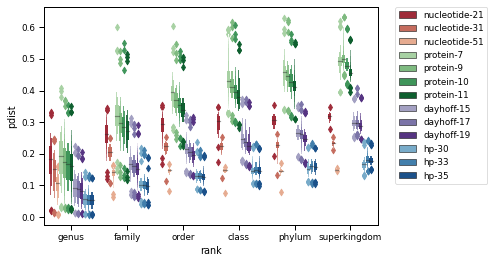

In [56]:
g=sns.boxenplot(data=jaccardMelt_noz, x="rank", y="pdist", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
#fig = g.get_figure()
#fig.savefig("anchor-jaccard.all.logscale.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

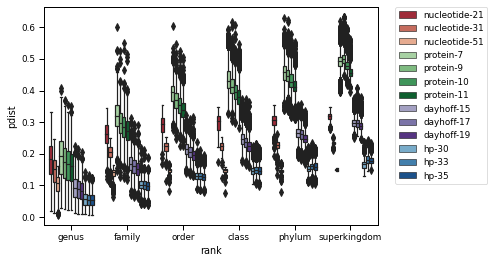

In [57]:
g=sns.boxplot(data=jaccardMelt_noz, x="rank", y="pdist", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
#g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

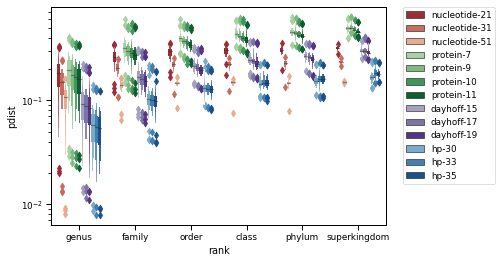

In [58]:
g=sns.boxenplot(data=jaccardMelt_noz, x="rank", y="pdist", hue="alpha-ksize", palette=alphak_colors, order=rankorder, hue_order=alphak_order ) #palette="GnBu_d"
g.set(yscale="log")
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [59]:
prot_nucl_onlyJaccard =  jaccardMelt_noz[jaccardMelt_noz["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-10"])]

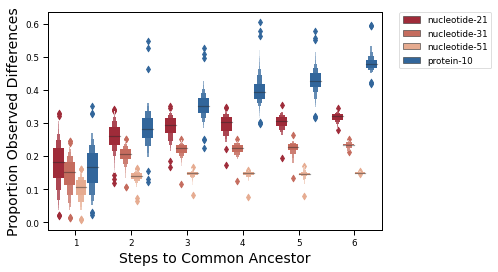

In [60]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="steps", y="pdist", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Proportion Observed Differences", size=14)
fig = g.get_figure()
fig.savefig("anchor-pdist.nucl3-prot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

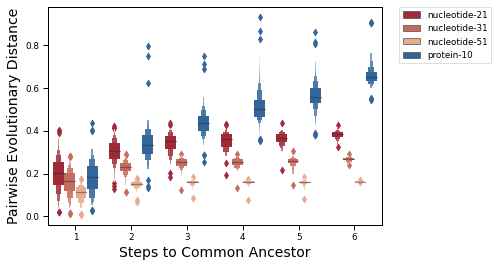

In [61]:
g=sns.boxenplot(data=prot_nucl_onlyJaccard, x="steps", y="evol-dist", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Steps to Common Ancestor", size=14)
plt.ylabel("Pairwise Evolutionary Distance", size=14)
fig = g.get_figure()
fig.savefig("anchor-evoldistPC.nucl3-prot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

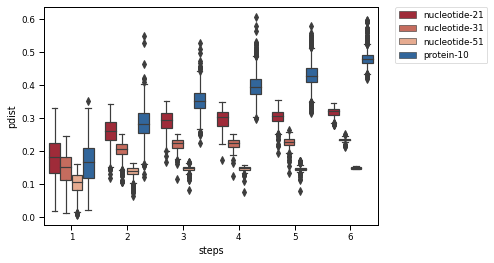

In [62]:
g=sns.boxplot(data=prot_nucl_onlyJaccard, x="steps", y="pdist", hue="alpha-ksize", palette=pnlong_colors, order=[1,2,3,4,5,6], hue_order=pnlong_colors ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot.pdist.boxplot.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [63]:
prot_nucl_onlyJaccard2 =  jaccardMelt_noz[jaccardMelt_noz["alpha-ksize"].isin(["nucleotide-21","nucleotide-31", "nucleotide-51", "protein-7"])]

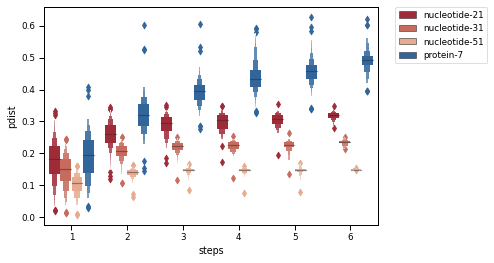

In [64]:
### look at protein 7 instead of 10

g=sns.boxenplot(data=prot_nucl_onlyJaccard2, x="steps", y="pdist", hue="alpha-ksize", palette=pnlong_colors2, order=[1,2,3,4,5,6], hue_order=pnlong_colors2 ) #palette="GnBu_d"
lgd=g.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
fig = g.get_figure()
fig.savefig("anchor-jaccard.nucl3-prot7.pdist.pdf", bbox_extra_artists=(lgd,), bbox_inches='tight')

In [65]:
jaccardMelt[jaccardMelt["evolpath"] == "path100"]

,evolpath,ksize,alphabet,alpha-ksize,rank,jaccard,jaccard1,steps
2,path100,11,protein,protein-11,anchor_species,1.000000,1.000100,0
2959,path100,15,dayhoff,dayhoff-15,anchor_species,1.000000,1.000100,0
5916,path100,17,dayhoff,dayhoff-17,anchor_species,1.000000,1.000100,0
8873,path100,19,dayhoff,dayhoff-19,anchor_species,1.000000,1.000100,0
11830,path100,35,hp,hp-35,anchor_species,1.000000,1.000100,0
...,...,...,...,...,...,...,...,...
254304,path100,30,hp,hp-30,superkingdom,0.003860,0.003960,6
257261,path100,9,protein,protein-9,superkingdom,0.001431,0.001531,6
260218,path100,31,nucleotide,nucleotide-31,superkingdom,0.000000,0.000100,6
263175,path100,21,nucleotide,nucleotide-21,superkingdom,0.000000,0.000100,6


In [66]:
jaccardMelt.query("evolpath == 'path200' and `alpha-ksize` == 'nucleotide-21'")

,evolpath,ksize,alphabet,alpha-ksize,rank,jaccard,jaccard1,steps
33640,path200,21,nucleotide,nucleotide-21,anchor_species,1.000000,1.000100,0
72081,path200,21,nucleotide,nucleotide-21,genus,0.034460,0.034560,1
110522,path200,21,nucleotide,nucleotide-21,family,0.001330,0.001430,2
148963,path200,21,nucleotide,nucleotide-21,order,0.001175,0.001275,3
187404,path200,21,nucleotide,nucleotide-21,class,0.000855,0.000955,4
225845,path200,21,nucleotide,nucleotide-21,phylum,0.000198,0.000298,5
264286,path200,21,nucleotide,nucleotide-21,superkingdom,0.000255,0.000355,6
